In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from google.colab import drive
drive.mount('/content/drive')  # Mount Google Drive

# Define paths
zip_file_path_in_drive = "/content/drive/My Drive/Colab_Datasets/archive (3).zip"
destination_path_in_colab = "/content/archive.zip"  # Rename for simplicity

# Copy zip file to Colab working directory with a safe name
!cp "{zip_file_path_in_drive}" "{destination_path_in_colab}"

# Optional: Remove old extracted folder if it exists
!rm -rf /content/BrainTumor

# Now unzip it
!unzip -o -q "{destination_path_in_colab}" -d "/content/"

# List content to verify
!ls /content


Mounted at /content/drive
archive.zip  BrainTumor  drive	sample_data


In [6]:
from ultralytics import YOLO
import os

# Corrected absolute path to data.yaml in Colab
data_yaml_path = "/content/BrainTumor/BrainTumorYolov11/data.yaml"

# Optional: Confirm the file exists in Colab
if os.path.exists(data_yaml_path):
    print(f"The file '{data_yaml_path}' exists in Colab.")
else:
    raise FileNotFoundError(f"Error: The file '{data_yaml_path}' does not exist in Colab.")

# Load a pre-trained YOLOv11 model (make sure you have this model in Colab)
model = YOLO("yolo11n.pt")  # Use the correct filename (download if needed)

# Start training
print("Starting training...")
trained_model = model.train(
    data=data_yaml_path,
    epochs=18,
    imgsz=640,
    batch=16,
    device=0
)

print("Training finished.")


The file '/content/BrainTumor/BrainTumorYolov11/data.yaml' exists in Colab.


100%|██████████| 5.35M/5.35M [00:00<00:00, 251MB/s]


Starting training...
Ultralytics 8.3.113 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/BrainTumor/BrainTumorYolov11/data.yaml, epochs=18, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_

100%|██████████| 755k/755k [00:00<00:00, 113MB/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

YOLO11n summary: 181 layers, 2,590,425 parameters, 2,590,409 gradients, 6.4 GFLOPs

Transferred 448/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1087.6±492.1 MB/s, size: 31.9 KB)


train: Scanning /content/BrainTumor/BrainTumorYolov11/train/labels... 2144 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2144/2144 [00:00<00:00, 2192.03it/s]


train: New cache created: /content/BrainTumor/BrainTumorYolov11/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2143, len(boxes) = 2144. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1114.0±517.8 MB/s, size: 34.0 KB)


val: Scanning /content/BrainTumor/BrainTumorYolov11/valid/labels... 612 images, 0 backgrounds, 0 corrupt: 100%|██████████| 612/612 [00:00<00:00, 1114.31it/s]

val: New cache created: /content/BrainTumor/BrainTumorYolov11/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 18 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/18      2.28G      1.331      3.573      1.413         25        640: 100%|██████████| 134/134 [00:41<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:06<00:00,  3.26it/s]


                   all        612        612      0.401       0.48      0.379      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/18      2.82G      1.331        2.5      1.383         26        640: 100%|██████████| 134/134 [00:38<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:04<00:00,  4.24it/s]


                   all        612        612      0.464      0.363      0.341      0.201

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/18      2.84G      1.344      2.099      1.394         32        640: 100%|██████████| 134/134 [00:37<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:04<00:00,  4.36it/s]


                   all        612        612      0.369      0.459      0.381       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/18      2.85G       1.33      1.859      1.389         22        640: 100%|██████████| 134/134 [00:37<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:04<00:00,  4.39it/s]

                   all        612        612      0.584       0.59      0.587      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/18      2.86G      1.273      1.628      1.343         31        640: 100%|██████████| 134/134 [00:37<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:04<00:00,  4.16it/s]


                   all        612        612      0.582      0.568      0.607      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/18      2.88G      1.242      1.517      1.317         33        640: 100%|██████████| 134/134 [00:38<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:05<00:00,  3.75it/s]

                   all        612        612      0.467      0.557      0.505      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/18      2.89G      1.195       1.42        1.3         25        640: 100%|██████████| 134/134 [00:36<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:05<00:00,  3.44it/s]

                   all        612        612      0.775      0.675      0.765      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/18      2.91G      1.113      1.289      1.249         25        640: 100%|██████████| 134/134 [00:36<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:05<00:00,  3.40it/s]

                   all        612        612      0.745      0.696      0.771      0.553


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/18      2.92G      1.083      1.197      1.242         16        640: 100%|██████████| 134/134 [00:36<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:05<00:00,  3.37it/s]

                   all        612        612      0.695      0.762      0.803      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/18      2.94G      1.053      1.078      1.213         16        640: 100%|██████████| 134/134 [00:34<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:05<00:00,  3.38it/s]

                   all        612        612      0.841      0.768      0.845      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/18      2.95G     0.9992     0.9779      1.185         16        640: 100%|██████████| 134/134 [00:34<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:05<00:00,  3.68it/s]

                   all        612        612      0.781      0.783      0.837       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/18      2.96G      0.993     0.9279      1.176         16        640: 100%|██████████| 134/134 [00:34<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:04<00:00,  4.26it/s]

                   all        612        612      0.813      0.807      0.859      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/18      2.98G     0.9684     0.8882      1.159         16        640: 100%|██████████| 134/134 [00:36<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:04<00:00,  4.43it/s]

                   all        612        612      0.831      0.787      0.868      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/18      2.99G     0.9321     0.8301      1.131         16        640: 100%|██████████| 134/134 [00:36<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:04<00:00,  4.47it/s]

                   all        612        612      0.863      0.827       0.89      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/18      3.01G     0.9238     0.8019      1.131         16        640: 100%|██████████| 134/134 [00:35<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:04<00:00,  4.49it/s]

                   all        612        612      0.842      0.847      0.896      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/18      3.03G     0.8767     0.7306      1.092         16        640: 100%|██████████| 134/134 [00:35<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:04<00:00,  4.42it/s]

                   all        612        612      0.888      0.857      0.912      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/18      3.04G     0.8511     0.6968      1.081         16        640: 100%|██████████| 134/134 [00:35<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:04<00:00,  4.37it/s]

                   all        612        612      0.882      0.828      0.911      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/18      3.05G      0.839     0.6681      1.074         16        640: 100%|██████████| 134/134 [00:35<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:04<00:00,  4.19it/s]

                   all        612        612      0.884      0.868      0.916      0.695



18 epochs completed in 0.212 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.113 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.41it/s]


                   all        612        612      0.884      0.868      0.917      0.695
                glioma        285        285      0.824      0.722      0.823      0.548
            meningioma        142        142      0.926      0.963       0.97        0.8
             pituitary        185        185      0.903      0.919      0.957      0.736
Speed: 0.3ms preprocess, 2.4ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/train
Training finished.


In [7]:
from ultralytics import YOLO

model = YOLO("/content/runs/detect/train/weights/best.pt")
metrics = model.val()  # Will return precision, recall, mAP, etc.

print(metrics)


Ultralytics 8.3.113 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 780.5±367.3 MB/s, size: 30.9 KB)


val: Scanning /content/BrainTumor/BrainTumorYolov11/valid/labels.cache... 612 images, 0 backgrounds, 0 corrupt: 100%|██████████| 612/612 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  4.13it/s]


                   all        612        612      0.884      0.868      0.916      0.696
                glioma        285        285      0.824      0.722      0.823      0.548
            meningioma        142        142      0.926      0.964       0.97      0.802
             pituitary        185        185      0.902      0.919      0.957      0.737
Speed: 1.6ms preprocess, 4.8ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7af63be1a590>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.

In [9]:
from google.colab import files
files.download("runs/detect/val/confusion_matrix.png")
files.download("runs/detect/val/PR_curve.png")
files.download("runs/detect/val/F1_curve.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

FileNotFoundError: Cannot find file: runs/detect/val/results.png

Saving 41598_2023_41576_Fig1_HTML.jpg to 41598_2023_41576_Fig1_HTML.jpg

image 1/1 /content/41598_2023_41576_Fig1_HTML.jpg: 640x640 1 meningioma, 21.7ms
Speed: 4.2ms preprocess, 21.7ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


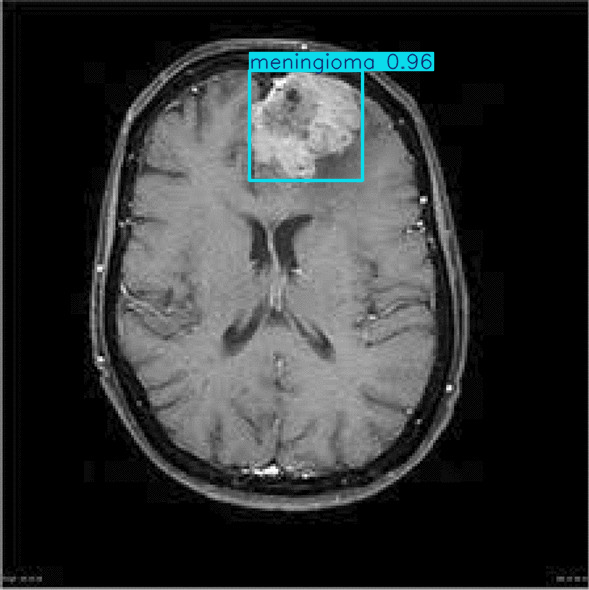

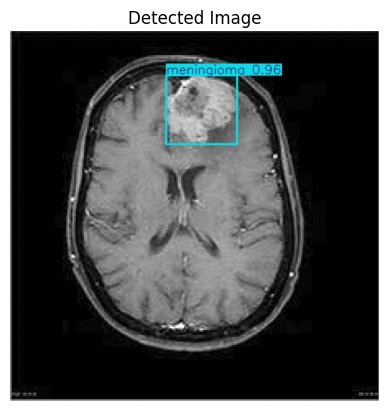

In [11]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# Load the trained model from your training directory
model = YOLO("runs/detect/train/weights/best.pt")  # Load the best trained weights

# Upload an image
from google.colab import files
uploaded = files.upload()  # Upload an image from your local system

# Get the filename of the uploaded image
image_path = list(uploaded.keys())[0]  # This gives the uploaded file's name

# Perform object detection
results = model(image_path)

# Show the image with bounding boxes
results[0].show()  # This displays the image with predictions

# Optional: Save the result to file
results[0].save(filename="detected_image.jpg")

# Show in notebook using matplotlib
img = Image.open("detected_image.jpg")
plt.imshow(img)
plt.axis('off')
plt.title("Detected Image")
plt.show()


Saving 41598_2023_41576_Fig1_HTML.jpg to 41598_2023_41576_Fig1_HTML (1).jpg

image 1/1 /content/41598_2023_41576_Fig1_HTML (1).jpg: 640x640 1 meningioma, 25.5ms
Speed: 8.9ms preprocess, 25.5ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)
--2025-04-22 11:07:33--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.157.254.124, 108.157.254.121, 108.157.254.102, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.157.254.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375042383 (358M) [binary/octet-stream]
Saving to: ‘sam_vit_b_01ec64.pth’

sam_vit_b_01ec64.pt 100%[===================>] 357.67M  34.4MB/s    in 5.3s    

2025-04-22 11:07:38 (67.7 MB/s) - ‘sam_vit_b_01ec64.pth’ saved [375042383/375042383]



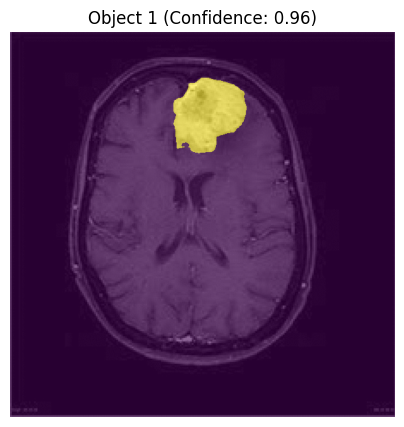

In [14]:
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamPredictor
from PIL import Image
from ultralytics import YOLO

# Load trained YOLO model
yolo_model = YOLO("runs/detect/train/weights/best.pt")

# Upload your image (or provide path)
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Run detection
results = yolo_model(image_path)
detections = results[0].boxes.xyxy.cpu().numpy().astype(int)  # xyxy format (x1, y1, x2, y2)
# Download SAM weights if not already present
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth

# Load the SAM model
sam_checkpoint = "sam_vit_b_01ec64.pth"
sam = sam_model_registry["vit_b"](checkpoint=sam_checkpoint)
sam.to("cuda" if torch.cuda.is_available() else "cpu")
predictor = SamPredictor(sam)
# Load image and set it for SAM
image_bgr = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
predictor.set_image(image_rgb)

# Loop through YOLO bounding boxes and apply SAM
for i, box in enumerate(detections):
    input_box = np.array(box)  # x1, y1, x2, y2
    masks, scores, logits = predictor.predict(box=input_box, multimask_output=True)

    # Plot the best mask (highest confidence)
    plt.figure(figsize=(5, 5))
    plt.imshow(image_rgb)
    plt.imshow(masks[0], alpha=0.6)  # semi-transparent mask
    plt.title(f"Object {i+1} (Confidence: {scores[0]:.2f})")
    plt.axis("off")
    plt.show()
